In [1]:
 #Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading dataset
train = pd.read_csv("/kaggle/input/brist1d/train.csv", low_memory=False)
test = pd.read_csv("/kaggle/input/brist1d/test.csv", low_memory=False)
sample = pd.read_csv("/kaggle/input/brist1d/sample_submission.csv", low_memory=False)

## Data Preprocessing Summary

### **1. Mapping `p_num` to Numeric Values**  
The `p_num` column, which contains categorical identifiers, is mapped to unique integer values. This makes the column suitable for machine learning models that require numerical input.

### **2. Dropping the id Column**
The id column, which serves as a unique identifier, is removed if it exists, as it does not provide predictive value for modeling.

### Purpose:
- Mapping p_num: Converts categorical data into a numerical format.
- Dropping id: Removes redundant columns that don't contribute to predictions.

In [3]:
# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(train['p_num'].unique())}

# Map p_num and process time directly
train['p_num'] = train['p_num'].map(mapping_dict)
# Drop the 'id' column if it exists
if 'id' in train.columns:
    train.drop(columns=['id'], inplace=True)

In [4]:
import pandas as pd

# Assuming train is a DataFrame
mapping_dict = {p: idx for idx, p in enumerate(test['p_num'].unique())}

# Map p_num and process time directly
test['p_num'] = test['p_num'].map(mapping_dict)


if 'id' in test.columns:
    test.drop(columns=['id'], inplace=True)

## Data Preprocessing 

### **1. Converting `time` to Datetime Format**  
The `time` column, which contains date and time information, is converted to the `datetime` format. This ensures that we can perform time-based operations such as extracting hours or calculating cyclical features. Invalid entries in the `time` column are converted to `NaT` (Not a Time) to prevent errors.

### **2. Creating Time-Based Features: `sin_hour` and `cos_hour`**  
To capture the cyclical nature of the hours in a day, two new features are created: `sin_hour` and `cos_hour`. These features are generated by applying sine and cosine transformations to the hour of the day. This encoding preserves the cyclical nature of time (i.e., 23:00 is close to 00:00).

### **3. Dropping the `time` Column**  
After generating the `sin_hour` and `cos_hour` features, the original `time` column is dropped, as the new features now encode the necessary time-related information for modeling.

### Purpose:
- Converting `time` to `datetime`: Allows for easy manipulation and extraction of time-based information.
- Creating `sin_hour` and `cos_hour`: Encodes the cyclical nature of time for better model performance.
- Dropping `time`: Removes redundant columns after transforming them into meaningful features.


In [5]:
# Ensure 'time' is in datetime format
train['time'] = pd.to_datetime(train['time'], errors='coerce')# Convert to datetime, invalid entries become NaT
test['time'] = pd.to_datetime(test['time'], errors='coerce')  # Apply to test as well

# Now you can safely use the .dt accessor
train["sin_hour"] = np.sin(np.pi * train['time'].dt.hour / 12)
train["cos_hour"] = np.cos(np.pi * train['time'].dt.hour / 12)

test["sin_hour"] = np.sin(np.pi * test['time'].dt.hour / 12)
test["cos_hour"] = np.cos(np.pi * test['time'].dt.hour / 12)


train = train.drop('time' , axis = 1)
test = test.drop('time' , axis = 1)

## Data Preprocessing Summary

### **1. Dropping Columns with High Percentage of Missing Values**  
A function `drop_columns_with_high_nan` is implemented to drop columns from the dataset that have more than a specified threshold (default 25%) of missing values. This step helps in cleaning the dataset by removing columns that are largely incomplete and may not contribute meaningfully to the model.

### **2. Function Details:**
- **Input:** 
    - The function takes the input DataFrame (`df`) and a threshold value to determine the percentage of missing values.
    - Default threshold is set to 25% (0.25).
- **Output:** 
    - It returns two objects: the cleaned DataFrame (with the problematic columns dropped) and a list of the column names that were dropped due to having too many missing value

### **3. Purpose:**
- Removing columns with a high percentage of missing values ensures that the model does not learn from incomplete or irrelevant data, improving overall performance and reducing noise.
- The `threshold` parameter can be adjusted depending on how strict you want to be regarding missing data.


In [6]:
def drop_columns_with_high_nan(df, threshold=0.5):
    """
    Drops columns from the DataFrame if they have more than a specified
    percentage of missing values and returns the names of these columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        threshold (float): The percentage threshold for missing values (default is 50%).

    Returns:
        tuple: 
            - pd.DataFrame: The DataFrame with columns having more than `threshold`% missing values dropped.
            - list: Names of the columns that were dropped.
    """
    # Calculate the threshold count for missing values
    missing_threshold = len(df) * threshold

    # Identify columns with more missing values than the threshold
    high_nan_columns = df.columns[df.isnull().sum() > missing_threshold].tolist()

    # Drop the identified columns
    cleaned_df = df.drop(columns=high_nan_columns)

    return cleaned_df, high_nan_columns

In [7]:
# Apply the function
train_cleaned, dropped_columns = drop_columns_with_high_nan(train, threshold=0.5)


print("\nDropped Columns:")
print(dropped_columns)

print("Cleaned DataFrame:")
train_cleaned.head()


Dropped Columns:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 'carbs-0:10', '

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,sin_hour,cos_hour
0,0,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4,1.000000,6.123234e-17
1,0,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,8.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8,1.000000,6.123234e-17
2,0,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5,1.000000,6.123234e-17
3,0,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,8.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8,1.000000,6.123234e-17
4,0,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7,0.965926,-2.588190e-01


## Data Preprocessing Summary

### **Applying Column Removal from Train to Test Data**  
The function `apply_column_removal_to_test` is designed to remove columns with a high percentage of missing values from the test data, based on the columns removed from the training data. This ensures consistency between the train and test datasets by keeping only the relevant features.


### **Purpose:**
- This step ensures that the test data remains consistent with the train data by applying the same column removal logic to both datasets.
- The dropped columns are those that have more than the specified threshold percentage of missing values in the training data. These columns are also removed from the test set to maintain feature alignment.



In [8]:
def apply_column_removal_to_test(train_df, test_df, threshold=0.5):
    """
    Applies column removal based on NaN threshold from train data to test data.
    
    Parameters:
        train_df (pd.DataFrame): The training DataFrame.
        test_df (pd.DataFrame): The test DataFrame.
        threshold (float): The percentage threshold for missing values (default is 50%).

    Returns:
        tuple:
            - pd.DataFrame: Cleaned test DataFrame with columns dropped.
            - list: Names of the columns dropped from the test data.
    """
    # Drop columns in train data and get the names of dropped columns
    _, high_nan_columns_train = drop_columns_with_high_nan(train_df, threshold)

    # Remove the same columns from test data
    cleaned_test_df = test_df.drop(columns=high_nan_columns_train, errors='ignore')

    return cleaned_test_df, high_nan_columns_train

In [9]:
# Apply the function
test_cleaned, dropped_columns = apply_column_removal_to_test(train, test, threshold=0.5)



print("\nDropped Columns from Test Data:")
print(dropped_columns)

print("Cleaned Test DataFrame:")
test_cleaned.head()


Dropped Columns from Test Data:
['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35', 'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10', 'carbs-5:05', 'carbs-5:00', 'carbs-4:55', 'carbs-4:50', 'carbs-4:45', 'carbs-4:40', 'carbs-4:35', 'carbs-4:30', 'carbs-4:25', 'carbs-4:20', 'carbs-4:15', 'carbs-4:10', 'carbs-4:05', 'carbs-4:00', 'carbs-3:55', 'carbs-3:50', 'carbs-3:45', 'carbs-3:40', 'carbs-3:35', 'carbs-3:30', 'carbs-3:25', 'carbs-3:20', 'carbs-3:15', 'carbs-3:10', 'carbs-3:05', 'carbs-3:00', 'carbs-2:55', 'carbs-2:50', 'carbs-2:45', 'carbs-2:40', 'carbs-2:35', 'carbs-2:30', 'carbs-2:25', 'carbs-2:20', 'carbs-2:15', 'carbs-2:10', 'carbs-2:05', 'carbs-2:00', 'carbs-1:55', 'carbs-1:50', 'carbs-1:45', 'carbs-1:40', 'carbs-1:35', 'carbs-1:30', 'carbs-1:25', 'carbs-1:20', 'carbs-1:15', 'carbs-1:10', 'carbs-1:05', 'carbs-1:00', 'carbs-0:55', 'carbs-0:50', 'carbs-0:45', 'carbs-0:40', 'carbs-0:35', 'carbs-0:30', 'carbs-0:25', 'carbs-0:20', 'carbs-0:15', 

,p_num,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,sin_hour,cos_hour
0,0,NaN,9.2,NaN,NaN,10.2,NaN,NaN,10.3,NaN,...,4.90,4.80,4.80,4.80,4.80,4.80,4.90,6.06,1.000000,6.123234e-17
1,0,NaN,NaN,9.9,NaN,NaN,9.4,NaN,NaN,9.1,...,9.70,13.92,16.22,16.69,23.12,30.51,24.57,32.43,0.258819,-9.659258e-01
2,0,NaN,5.5,NaN,NaN,5.5,NaN,NaN,5.2,NaN,...,9.98,25.24,12.27,6.83,6.53,7.97,19.76,10.16,-0.500000,-8.660254e-01
3,0,NaN,3.4,NaN,NaN,3.9,NaN,NaN,4.7,NaN,...,4.80,5.00,4.90,4.90,4.80,4.80,4.90,4.80,0.866025,5.000000e-01
4,0,NaN,NaN,8.3,NaN,NaN,10.0,NaN,NaN,12.2,...,4.80,4.80,4.90,4.80,4.80,4.80,4.80,4.80,0.866025,5.000000e-01


In [10]:
print("Updated df_train:",train_cleaned.shape)
print("Updated df_test:",test_cleaned.shape)

Updated df_train: (177024, 292)
Updated df_test: (3644, 291)


# Data Preprocessing Summary 

## 1. Handling Missing Values for Different Columns
The updated code handles missing values based on column types and their characteristics. Blood glucose (`bg-`) and heart rate (`hr`) columns are processed using **interpolation**, while columns related to `insulin`, `calories`, `steps`, and `carbs` are filled with `0`.

---

## 2. Functionality Breakdown

### For Blood Glucose (`bg-`) and Heart Rate (`hr`) Columns:
- **Missing values are filled using linear interpolation**. This method estimates missing values based on their neighboring observations within a row.
- Interpolation ensures a smooth and consistent representation of data trends, preserving logical continuity.
- **Interpolation is applied across rows (`axis=1`)**, meaning missing values are calculated horizontally for each individual data entry.
- This approach maintains the trend and avoids abrupt or unrealistic jumps in blood glucose and heart rate values.

---

### For Insulin, Calories, Steps, and Carbs Columns (`insulin`, `cals`, `steps`, `carbs`):
- **Missing values in these columns are replaced with `0`.**
- Filling with `0` reflects the assumption that missing data corresponds to no recorded activity, intake, or administration (e.g., no insulin or calorie intake).
- **Columns included:**
  - `insulin_cols`: Columns related to insulin levels.
  - `cals_cols`: Columns representing calorie data.
  - `steps_cols`: Columns containing step count data.
  - `carbs_cols`: Columns related to carbohydrate intake.

---

## 3. Purpose

### Blood Glucose and Heart Rate Data:
- Interpolation ensures that the data for `bg-` and `hr` columns is complete and continuous, suitable for analysis of trends or patterns over time.
- This method is especially appropriate for time-series or physiological data, where missing values are best estimated based on adjacent readings.

### Insulin, Calories, Steps, and Carbs Data:
- Filling with `0` ensures that these columns are ready for analysis without introducing artificial trends.
- The assumption of `0` for missing values simplifies preprocessing and is appropriate for contexts where the absence of data implies no corresponding activity or measurement.
fic trend or pattern.


In [11]:
# Define related column sets (bg_cols, insulin_cols, cals_cols, steps_cols, carbs_cols, hr_cols)
bg_cols = [col for col in train_cleaned.columns if col.startswith('bg-')]
hr_cols = [col for col in train_cleaned.columns if col.startswith('hr')]

carbs_cols = [col for col in test_cleaned.columns if col.startswith('carbs')]
insulin_cols = [col for col in test_cleaned.columns if col.startswith('insulin')]
steps_cols = [col for col in test_cleaned.columns if col.startswith('steps')]
cals_cols = [col for col in test_cleaned.columns if col.startswith('cals')]

In [12]:
# Combine all relevant columns
fill_zero_cols = carbs_cols + insulin_cols + steps_cols + cals_cols

# Fill missing values with 0 for these columns
train_cleaned[fill_zero_cols] = train_cleaned[fill_zero_cols].fillna(0)
test_cleaned[fill_zero_cols] = test_cleaned[fill_zero_cols].fillna(0)

In [13]:
time_series_cols = bg_cols + hr_cols



# Step 1: Linear interpolation for missing values in bg_cols and hr_cols
train_cleaned[time_series_cols] = train_cleaned[time_series_cols].interpolate(
    method='linear', axis=1, limit_direction='both')
test_cleaned[time_series_cols] = test_cleaned[time_series_cols].interpolate(
    method='linear', axis=1, limit_direction='both')

# Checking for Remaining Missing Values

After applying the missing value imputation strategies, we check if there are any remaining missing values in the `train_cleaned` and `test_cleaned` datasets.

## **Purpose of the Check:**
### **Objective:** 
The check ensures that all missing values have been handled effectively during the preprocessing steps.

### **Expected Result:** 
If no missing values remain, both outputs should print False, indicating that there are no missing values in the datasets.

### **If True:** 
If True is returned, there are still columns with missing values in the dataset, requiring further imputation or investigation.

In [14]:

print(train_cleaned.isnull().sum().any())

print(test_cleaned.isnull().sum().any())


False
False


## Extracting Specific Columns for Analysis

### **2. Purpose:**

#### **Identifying Relevant Columns:**

- **`past_hour_columns`:** Extracts columns that contain the prefix `"-0:"`, which likely represent the previous hour's data.
  
- **`columns_to_keep`:** Combines important features including:
  - **`p_num`:** Participant number (numeric).
  - **`sin_hour` & `cos_hour`:** Features representing the time of day, encoded using sine and cosine transformations to capture cyclical patterns in time.
  - **`bg+1:00`:** The target column, which likely represents the glucose measurement for the next hour.
  - **Past Hour Columns:** The columns that represent data from the previous hour(s), identified by the prefix `"-0:"`.One Hour DataOne Hour Ahead?**

The goal is to predict the glucose values one hour ahead. By including features such as the sine and cosine transformations of the hour, along with the data from the previous hour, the model can capture both the cyclical nature of time and the immediate past behavior of glucose measurements. Using data from just the past hour is sufficient to capture meaningful patterns and trends that help predict the next value. This approach keeps the model simple while effectively predicting the target.

### **3. Resulting DataFrame:**

The filtered DataFrame `train_df` now includes only the relevant columns for further analysis or model training. It contains the necessary information from the previous hour, participant number, time of day, and the target glucose measurement for the next hour.
model training.


In [15]:
# Extract past hour columns (prefix "0:")
past_hour_columns = [col for col in train_cleaned.columns if "-0:" in col]

# Include participant number (p_num), sin_hour, cos_hour, and target column (bg+1:00)
columns_to_keep = ['p_num', 'sin_hour', 'cos_hour', 'bg+1:00'] + past_hour_columns

# Filter the DataFrame
train_df = train_cleaned[columns_to_keep]

# Display the result
train_df.sample(2)

,p_num,sin_hour,cos_hour,bg+1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
60148,2,1.0,6.123234e-17,7.0,8.7,8.7,8.7,8.7,8.6,8.2,...,5.60,5.72,5.84,5.60,5.60,5.60,5.60,5.60,5.60,5.6
144122,7,-1.0,-1.836970e-16,10.9,5.7,5.8,5.9,6.1,6.3,6.4,...,28.55,22.73,15.59,8.21,8.93,12.02,17.72,16.29,21.18,10.6


In [16]:
# Extract past hour columns (prefix "0:")
past_hour_columns = [col for col in test_cleaned.columns if "-0:" in col]

# Include participant number (p_num), sin_hour, cos_hour, and target column (bg+1:00)
columns_to_keep_in_test = ['p_num', 'sin_hour', 'cos_hour'] + past_hour_columns

# Filter the DataFrame
test_df = test_cleaned[columns_to_keep_in_test]

# Display the result
test_df.sample(2)

,p_num,sin_hour,cos_hour,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,...,cals-0:45,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00
3093,12,-0.866025,0.500000,10.8,10.2,9.3,8.5,7.5,6.5,5.8,...,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.50,4.50
1900,7,-0.965926,-0.258819,3.4,3.3,3.2,3.4,3.7,4.1,4.5,...,6.75,6.75,6.75,6.75,7.71,6.75,15.02,27.72,29.07,30.69


## Identifying Missing Columns Between Train and Test DataFrames

### **Purpose:**
Before training a model, it's important to ensure that the train and test datasets have the same columns. This section of the code helps identify any columns that are missing from either the training or the test set. 


In [17]:
# Identify missing columns in train compared to test
missing_in_train = set(test_df.columns) - set(train_df.columns)
print(f"Missing columns in train: {missing_in_train}")

# Identify missing columns in test compared to train
missing_in_test = set(train_df.columns) - set(test_df.columns)
print(f"Missing columns in test: {missing_in_test}")

Missing columns in train: set()
Missing columns in test: {'bg+1:00'}


## Checking for Missing Values in Train and Test DataFrames

### **Purpose:**
It is essential to verify whether there are missing values in both the training and test datasets before proceeding with model training. Missing values can affect model performance and should be handled appropriately.


In [18]:
# Check for missing values in train_filtered
missing_train = train_df.isnull().sum()
print("Missing values in train_filtered:")
print(missing_train[missing_train > 0])

# Check for missing values in test_df
missing_test = test_df.isnull().sum()
print("Missing values in test_df:")
print(missing_test[missing_test > 0])

# Summary
if missing_train.sum() == 0 and missing_test.sum() == 0:
    print("Both datasets are complete: No missing values.")
else:
    print("Missing values found. Please address them.")


Missing values in train_filtered:
Series([], dtype: int64)
Missing values in test_df:
Series([], dtype: int64)
Both datasets are complete: No missing values.


## Renaming Columns for Consistency

### **Purpose:**
The purpose of renaming the columns is to ensure consistency and avoid issues when working with certain characters that may not be compatible with some machine learning frameworks. In particular:
- Special characters like `:` and `-` may cause issues in column names.
- We keep the target column name unchanged to avoid any disruptions in target-related tasks.


In [19]:
# Define the target column name before renaming
target_column = 'bg+1:00'

# Sanitize only feature columns
train_df = train_df.rename(columns=lambda col: col if col == target_column else col.replace(':', '_').replace('-', '_'))
test_df = test_df.rename(columns=lambda col: col if col == target_column else col.replace(':', '_').replace('-', '_'))

# Verify that the target column name remains unchanged
print("Sanitized Train Columns:", train_df.columns.tolist())
print("Sanitized Test Columns:", test_df.columns.tolist())


Sanitized Train Columns: ['p_num', 'sin_hour', 'cos_hour', 'bg+1:00', 'bg_0_55', 'bg_0_50', 'bg_0_45', 'bg_0_40', 'bg_0_35', 'bg_0_30', 'bg_0_25', 'bg_0_20', 'bg_0_15', 'bg_0_10', 'bg_0_05', 'bg_0_00', 'insulin_0_55', 'insulin_0_50', 'insulin_0_45', 'insulin_0_40', 'insulin_0_35', 'insulin_0_30', 'insulin_0_25', 'insulin_0_20', 'insulin_0_15', 'insulin_0_10', 'insulin_0_05', 'insulin_0_00', 'hr_0_55', 'hr_0_50', 'hr_0_45', 'hr_0_40', 'hr_0_35', 'hr_0_30', 'hr_0_25', 'hr_0_20', 'hr_0_15', 'hr_0_10', 'hr_0_05', 'hr_0_00', 'cals_0_55', 'cals_0_50', 'cals_0_45', 'cals_0_40', 'cals_0_35', 'cals_0_30', 'cals_0_25', 'cals_0_20', 'cals_0_15', 'cals_0_10', 'cals_0_05', 'cals_0_00']
Sanitized Test Columns: ['p_num', 'sin_hour', 'cos_hour', 'bg_0_55', 'bg_0_50', 'bg_0_45', 'bg_0_40', 'bg_0_35', 'bg_0_30', 'bg_0_25', 'bg_0_20', 'bg_0_15', 'bg_0_10', 'bg_0_05', 'bg_0_00', 'insulin_0_55', 'insulin_0_50', 'insulin_0_45', 'insulin_0_40', 'insulin_0_35', 'insulin_0_30', 'insulin_0_25', 'insulin_0_20', 

### **Inspecting the Shape of the DataFrames**

To understand the structure of the datasets, we print the shape of both the training and test DataFrames. The shape provides important information on the number of rows and columns in each dataset, helping us assess the size and completeness of the data before proceeding with any further analysis or modeling.


In [22]:
# Inspect the overall shape of the DataFrames
print("Overall Shapes:")
print(f"Train DataFrame Shape: {train_df.shape}")
print(f"Test DataFrame Shape: {test_df.shape}\n")

Overall Shapes:
Train DataFrame Shape: (177024, 52)
Test DataFrame Shape: (3644, 51)



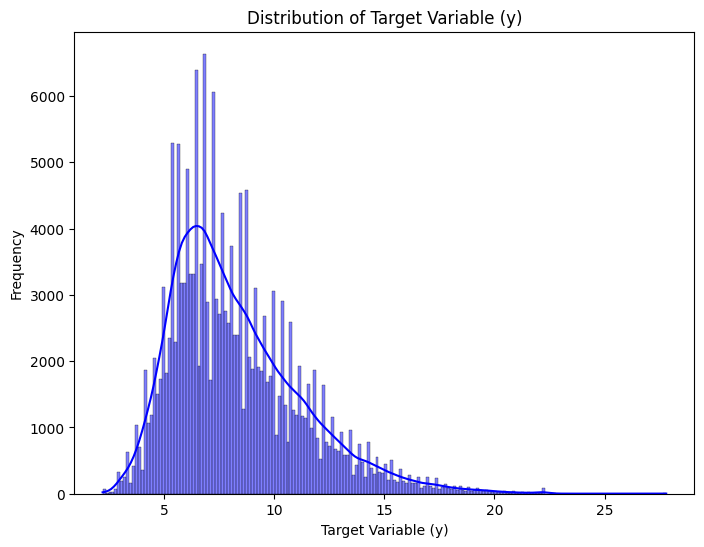

Skewness of Target Variable (y) before transformation: 1.07


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew 

# Plot histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_df['bg+1:00'], kde=True, color='blue')
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target Variable (y)')
plt.ylabel('Frequency')
plt.show()

# Calculate skewness
skewness_value = skew(train_df['bg+1:00'])
print(f"Skewness of Target Variable (y) before transformation: {skewness_value:.2f}")

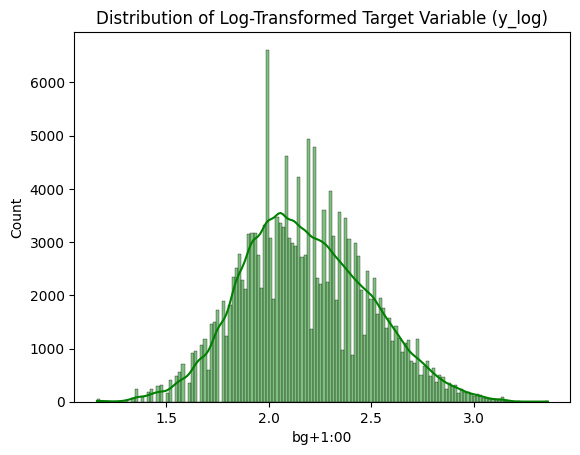

Skewness after Log Transformation: 0.21


In [24]:
# Log transformation
train_df['bg+1:00'] = np.log1p(train_df['bg+1:00'])

# Plot histogram of transformed target
sns.histplot(train_df['bg+1:00'], kde=True, color='green')
plt.title('Distribution of Log-Transformed Target Variable (y_log)')
plt.show()

# Check skewness after transformation
log_skewness_value = skew(train_df['bg+1:00'])
print(f"Skewness after Log Transformation: {log_skewness_value:.2f}")


### **Splitting Data into Features and Target**

The first step in preparing the data for machine learning is separating the target variable (`bg+1:00`) from the features. The target variable represents the blood glucose measurement for the next hour, which we aim to predict. The remaining columns are used as the input features for the model.

#### **Code Explanation:**

1. **Separating Features and Target:**
   - `X`: This is the feature matrix created by dropping the target column (`bg+1:00`) and the participant number column (`p_num`) from the DataFrame.
   - `y`: This is the target vector, which contains the values from the `bg+1:00` column.

2. **Splitting the Data into Training and Validation Sets:**
   - The dataset is split into training and validation sets using `train_test_split` from `sklearn.model_selection`.
   - The `test_size=0.2` argument indicates that 20% of the data will be used for validation, while the remaining 80% will be used for training.
   - `random_state=42` ensures reproducibility of the split.

In [25]:
X = train_df.drop(['bg+1:00', 'p_num'], axis=1)
y = train_df['bg+1:00']
groups = train_df['p_num']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [26]:
from sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
scaler = RobustScaler()

# Apply the scaler to the features
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Verify the scaling
X_train_scaled[:2]


array([[ 0.35355339, -0.61237244, -0.31578947, -0.34210526, -0.36842105,
        -0.39473684, -0.42105263, -0.44736842, -0.47368421, -0.47368421,
        -0.5       , -0.52631579, -0.52631579, -0.48717949, -0.60556258,
        -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 ,
        -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 , -0.9216182 ,
         0.65865992, -0.29137116, -0.31205674, -0.24113475, -0.25886525,
        -0.24113475, -0.2155477 , -0.26501767, -0.2614841 , -0.2155477 ,
        -0.13427562, -0.15194346, -0.1024735 ,  0.25806452,  0.25723473,
         0.25806452,  0.25806452,  0.25396825,  0.25396825,  0.25806452,
         0.25396825,  0.25477707,  0.25806452,  0.25316456,  0.25396825],
       [ 0.61237244, -0.35355339,  0.        , -0.02631579, -0.05263158,
        -0.10526316, -0.07894737, -0.05263158, -0.07894737, -0.07894737,
        -0.13157895, -0.07894737, -0.13157895, -0.20512821,  0.65865992,
        -0.9216182 ,  0.3426043 ,  0.3426043 ,  4.

In [27]:
y

0         2.667228
1         2.624669
2         2.803360
3         2.760010
4         2.617396
            ...   
177019    2.493205
177020    2.476538
177021    2.459589
177022    2.442347
177023    2.415914
Name: bg+1:00, Length: 177024, dtype: float64

### **Inspecting the Shape of the Training and Validation Data**

After splitting the dataset into features (`X`) and target (`y`), and further dividing them into training and validation sets, it's important to verify the shape of the resulting datasets. This ensures that the split was performed correctly and that we have the expected number of samples in both sets.

#### **Code Explanation:**

The following code prints the shape of the training and validation data:

1. **Training Data (`X_train`):** This will contain 80% of the data for model training.
2. **Validation Data (`X_val`):** This will contain the remaining 20% of the data, which will be used for model evaluation.


In [28]:


print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")




print(f"Training data shape after scaling: {X_train_scaled.shape}")
print(f"Validation data shapeafter scaling: {X_val_scaled.shape}")

Training data shape: (141619, 50)
Validation data shape: (35405, 50)
Training data shape after scaling: (141619, 50)
Validation data shapeafter scaling: (35405, 50)


-------

In [29]:
from fastai.tabular.all import *
import pandas as pd
from fastai.callback.tracker import EarlyStoppingCallback, SaveModelCallback

In [30]:
from fastai.tabular.all import TabularDataLoaders, TabularLearner, accuracy, rmse, Categorify, FillMissing, Normalize
import pandas as pd
import numpy as np

# Convert scaled features back to DataFrame for FastAI
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns = X_val.columns)

# Combine scaled features with their corresponding target
train_scaled = X_train_scaled_df.copy()
train_scaled['bg+1:00'] = y_train.values  # Replace 'target' with your actual target column name

val_scaled = X_val_scaled_df.copy()
val_scaled['bg+1:00'] = y_val.values  # Replace 'target' with your actual target column name

# Get continuous features in one line, excluding 'bg+1:00' (or use your actual target column name)
cont_features = [col for col in train_scaled.select_dtypes(include=['int64', 'float64', 'int32', 'float32'])
                 .columns if col != 'bg+1:00']

# Create TabularDataLoaders for FastAI using the combined train and validation sets
dls = TabularDataLoaders.from_df(
    train_scaled,  # Use the pre-scaled train set
    procs=[Categorify],  # Add processors to handle missing values and normalization
    cont_names=cont_features,  # Pass in the continuous feature names
    y_names='bg+1:00',  # Pass in the target column name;
    valid_idx=val_scaled.index  # Specify validation indices
)

# Check the DataLoaders to ensure everything looks good
print(dls.train.dataset)  # Inspect the first row in the training set
print(dls.valid.dataset)  # Inspect the first row in the validation set

            sin_hour      cos_hour   bg_0_55   bg_0_50   bg_0_45   bg_0_40  \
35405   1.830127e-01  6.830127e-01  0.947368  0.789474  0.736842  0.868421   
35406   1.830127e-01  6.830127e-01 -0.342105 -0.315789 -0.315789 -0.263158   
35407  -1.830127e-01 -6.830127e-01 -0.394737 -0.236842 -0.078947  0.000000   
35408  -5.000000e-01  5.000000e-01 -0.175439 -0.192982 -0.210526 -0.307018   
35409  -6.123725e-01 -3.535534e-01 -0.263158 -0.500000 -0.921053 -1.131579   
...              ...           ...       ...       ...       ...       ...   
141614  5.000000e-01  5.000000e-01 -0.657895 -0.657895 -0.605263 -0.631579   
141615  7.071068e-01  1.731912e-16 -0.578947 -0.578947 -0.605263 -0.605263   
141616 -8.659561e-17  7.071068e-01  0.868421  0.868421  0.763158  0.578947   
141617  5.000000e-01 -5.000000e-01 -0.289474 -0.236842 -0.236842 -0.263158   
141618  3.535534e-01 -6.123725e-01 -0.657895 -0.526316 -0.447368 -0.421053   

         bg_0_35   bg_0_30   bg_0_25   bg_0_20  ...  cals_0_40 

In [31]:
from fastai.tabular.all import *

config = tabular_config( ps=0.4) # Dropout rates for each layer

# Create a TabularLearner with custom configuration
learn = tabular_learner(
    dls, 
    layers=[2000, 1500, 1000, 500, 300, 100],
    metrics=rmse,         # Evaluation metric
    config=config,        # Configuration for dropout and other parameters
    cbs=[                 # Callbacks for early stopping and saving the best model
        EarlyStoppingCallback(monitor='valid_loss', patience=5),
        SaveModelCallback(monitor='valid_loss', fname='best_model')
    ]
)

# Print the model to verify its structure
print(learn)


SuggestedLRs(valley=0.0017782794311642647)


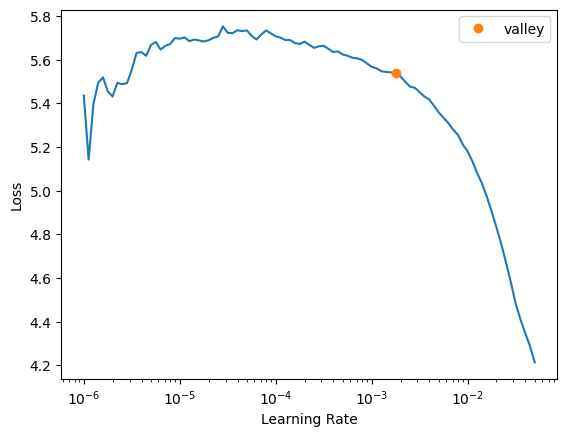

In [32]:
# Finding optimal learning rate
#lr = learn.lr_find()
lr = learn.lr_find(start_lr=1e-6, end_lr=1e-1)

print(lr)

In [33]:
# Training with one-cycle policy
learn.fit_one_cycle(100, lr_max = 0.01)# wd=1e-4

epoch,train_loss,valid_loss,_rmse,time
0,0.184511,0.074944,0.273760,02:08
1,0.082302,0.056120,0.236897,02:09
2,0.063131,0.052752,0.229677,02:09
3,0.059563,0.052337,0.228772,02:08
4,0.056340,0.052396,0.228901,01:48
5,0.051198,0.051474,0.226880,01:36
6,0.049799,0.052072,0.228194,01:36
7,0.051763,0.057448,0.239684,01:36
8,0.050714,0.049933,0.223457,01:36
9,0.050019,0.053262,0.230785,01:37


Better model found at epoch 0 with valid_loss value: 0.07494448125362396.
Better model found at epoch 1 with valid_loss value: 0.05612007528543472.
Better model found at epoch 2 with valid_loss value: 0.05275152996182442.
Better model found at epoch 3 with valid_loss value: 0.05233663320541382.
Better model found at epoch 5 with valid_loss value: 0.05147435516119003.
Better model found at epoch 8 with valid_loss value: 0.04993319511413574.
No improvement since epoch 8: early stopping


In [34]:
# Load the best model saved during training
learn.load('best_model')

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

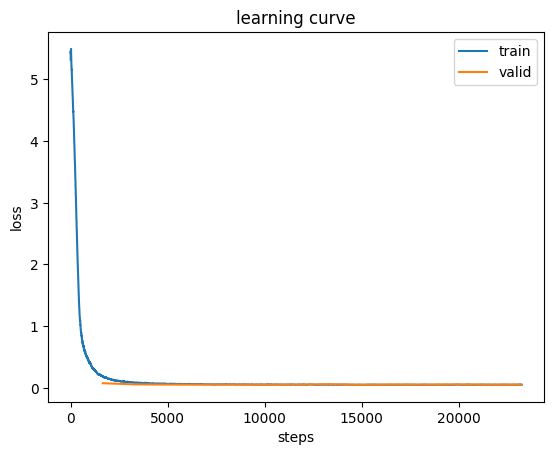

In [35]:
learn.recorder.plot_loss()

In [36]:
# Get predictions on the validation set
preds, targs = learn.get_preds(ds_idx=1)  # ds_idx=1 specifies the validation set in FastAI

# Convert predictions and targets to numpy arrays
y_pred = preds.numpy()
y_val = targs.numpy()


# Assuming y_pred and y_val were log-transformed before the split
y_pred_original_scale = np.expm1(y_pred)  # Reverse log transformation on predictions
y_val_original_scale = np.expm1(y_val)    # Reverse log transformation on actual target values

# Optional: Print or check the shapes to ensure correctness
print("Predictions on original scale:", y_pred_original_scale.shape)
print("Targets on original scale:", y_val_original_scale.shape)

# If you want to check the first few predictions and targets on the original scale:
print("First 5 predictions (original scale):", y_pred_original_scale[:5])
print("First 5 targets (original scale):", y_val_original_scale[:5])

Predictions on original scale: (35405, 1)
Targets on original scale: (35405, 1)
First 5 predictions (original scale): [[6.5033183]
 [6.713333 ]
 [7.6032343]
 [5.8948627]
 [6.410831 ]]
First 5 targets (original scale): [[ 6.5999994]
 [ 8.299999 ]
 [10.300001 ]
 [ 4.7      ]
 [10.800001 ]]


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate RMSE, MAE, and R²

# Calculate RMSE, MAE, and R² on the original scale
rmse = np.sqrt(mean_squared_error(y_val_original_scale, y_pred_original_scale))
mae = mean_absolute_error(y_val_original_scale, y_pred_original_scale)
r2 = r2_score(y_val_original_scale, y_pred_original_scale)

# Print out the results
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

RMSE: 2.190568208694458
MAE: 1.589806079864502
R²: 0.45302554027466724


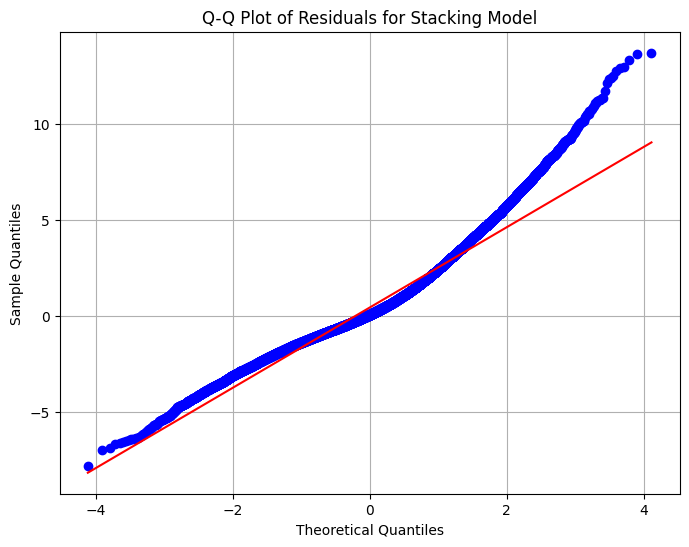

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

# Calculate residuals
residuals = y_val_original_scale.flatten() - y_pred_original_scale.flatten()

# Plot the Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals for Stacking Model")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.grid(True)
plt.show()

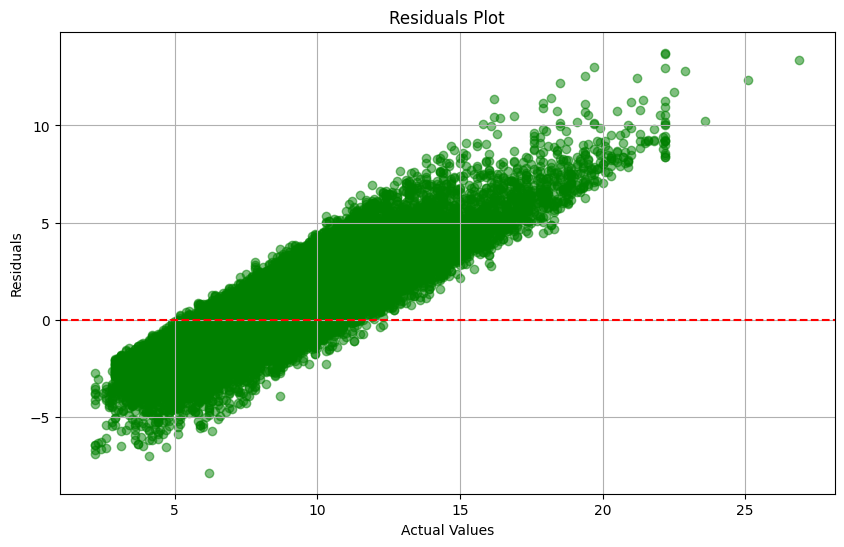

In [39]:
# Calculate residuals
residuals = y_val_original_scale.flatten() - y_pred_original_scale.flatten()
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_val_original_scale, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.title("Residuals Plot")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

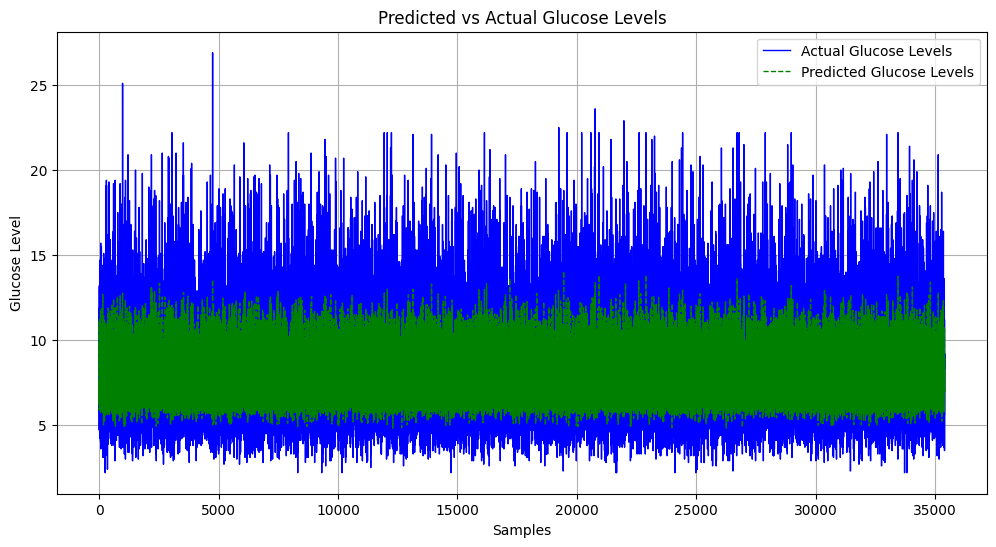

In [40]:
import matplotlib.pyplot as plt

# Plot the Actual vs Predicted Glucose Levels
plt.figure(figsize=(12, 6))
plt.plot(y_val_original_scale, label='Actual Glucose Levels', color='blue', linestyle='-', linewidth=1)
plt.plot(y_pred_original_scale, label='Predicted Glucose Levels', color='green', linestyle='--', linewidth=1)
plt.xlabel('Samples')
plt.ylabel('Glucose Level')
plt.title('Predicted vs Actual Glucose Levels')
plt.legend()
plt.grid(True)
plt.show()

## interference


In [41]:
# Assuming 'scaler' is the StandardScaler fitted on training data
test_scaled = scaler.transform(test_df[cont_features])  # Ensure the same features are selected

# Convert the scaled test data back to a DataFrame
test_scaled_df = pd.DataFrame(test_scaled, columns=cont_features)

In [42]:
# Prepare the Test DataLoader
test_dl = dls.test_dl(test_scaled_df)  # You already have 'dls' loaded from the training set

# Load the best model
learn.load('best_model')

# Make predictions on the test set
preds, _ = learn.get_preds(dl=test_dl)

# Convert predictions to a numpy array
predictions = preds.numpy()

# Reverse log transformation 

predictions_original = np.exp(predictions)  

# Convert the predictions to a DataFrame
pred_df = pd.DataFrame(predictions_original, columns=['bg+1:00'])  # Adjust the column name if needed

# Optionally, include the 'id' column in the predictions dataframe (from test set)
# Assuming `sample` is your test set dataframe that has the 'id' column
pred_df['id'] = sample['id']  # Make sure to use the correct 'id' column from your test dataframe

# Reorder columns to have 'id' first
pred_df = pred_df[['id', 'bg+1:00']]

# Save predictions to a CSV file
pred_df.to_csv('submission.csv', index=False)

# Optionally, print a message confirming successful saving
print("Predictions saved to 'submission.csv'")

Predictions saved to 'submission.csv'


In [43]:
pred_df

,id,bg+1:00
0,p01_8459,9.414984
1,p01_8460,6.872184
2,p01_8461,7.854716
3,p01_8462,10.941309
4,p01_8463,7.477810
...,...,...
3639,p24_256,7.680785
3640,p24_257,11.180966
3641,p24_258,7.844497
3642,p24_259,9.149324
